In [1]:
from trsm import TRSM, combos

In [14]:
filename = f'../signal/skimmed/NMSSM_XYH_YToHH_6b_MX_700_MY_400_testing_set_skimmed.root'
trsm = TRSM(filename=filename)

-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Opening ROOT file ../signal/skimmed/NMSSM_XYH_YToHH_6b_MX_700_MY_400_testing_set_skimmed.root with columns
-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Tree contains 52891 events.
----------------------------------------------------------------------------------------------------
                                            TABLE COLUMNS                                           
----------------------------------------------------------------------------------------------------
jet_pt                            jet_eta                           jet_phi                           
jet_m                             jet_btag                          jet_qgl                           
jet_idx                           jet_hadronFlav                    jet_partonFlav                    
HX_b1_recojet_m                   HX_b1_recojet_pt                  HX_b1_recojet_eta      

In [15]:
combos7 = combos(trsm, 7)

100%|██████████| 52891/52891 [00:24<00:00, 2135.55it/s]
Total events chosen: 8052


In [16]:
from keras.models import model_from_json
from pickle import load

In [17]:
tag = 'lr_0pt0001_beta1_0pt1_beta2_0pt5'

In [18]:
json_file = open(f'../models/classifier_6jet/{tag}/model/model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(f'../models/classifier_6jet/{tag}/model/model_1.h5')
scaler = load(open(f'../models/classifier_6jet/{tag}/model/scaler_1.pkl', 'rb'))

In [19]:
test_features_7 = scaler.transform(combos7.combo_features)
scores_7 = loaded_model.predict(test_features_7)[:,0]
scores_7.shape

(56364,)

In [20]:
import awkward as ak
import numpy as np

In [21]:
import matplotlib.pyplot as plt
from consistent_plots import hist, hist2d

In [22]:
def norm_hist(arr, bins=100):
    n, b = np.histogram(arr, bins=bins)
    x = (b[:-1] + b[1:]) / 2
    
    return n/n.max(), b, x

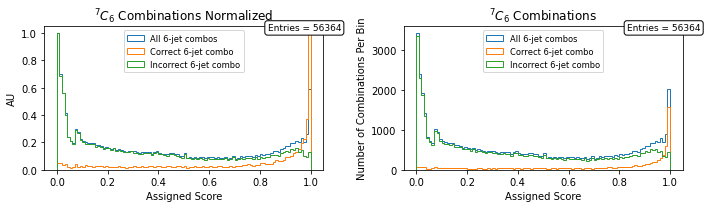

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

ax = axs[0]
ax.set_title(r"$^7C_6$ Combinations Normalized")

n_7, b_7, x_7 = norm_hist(scores_7)
c_n_7, b_7, x_7 = norm_hist(scores_7[combos7.sgnl_mask])
w_n_7, b_7, x_7 = norm_hist(scores_7[~combos7.sgnl_mask])

hist(ax, x_7, weights=n_7, bins=b_7, label='All 6-jet combos')
hist(ax, x_7, weights=c_n_7, bins=b_7, label='Correct 6-jet combo')
hist(ax, x_7, weights=w_n_7, bins=b_7, label='Incorrect 6-jet combo')
ax.legend(fontsize='small', loc=9)

ax.set_xlabel('Assigned Score')
ax.set_ylabel('AU')

textstr = f'Entries = {len(scores_7)}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.8, 1.02, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

ax = axs[1]
ax.set_title(r"$^7C_6$ Combinations")

n_7, b_7 = np.histogram(scores_7, bins=100)
c_n_7, b_7 = np.histogram(scores_7[combos7.sgnl_mask], bins=100)
w_n_7, b_7 = np.histogram(scores_7[~combos7.sgnl_mask], bins=100)

x_7 = (b_7[1:] + b_7[:-1]) / 2

hist(ax, x_7, weights=n_7, bins=b_7, label='All 6-jet combos')
hist(ax, x_7, weights=c_n_7, bins=b_7, label='Correct 6-jet combo')
hist(ax, x_7, weights=w_n_7, bins=b_7, label='Incorrect 6-jet combo')
ax.legend(fontsize='small', loc=9)

ax.set_xlabel('Assigned Score')
ax.set_ylabel('Number of Combinations Per Bin')

textstr = f'Entries = {len(scores_7)}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.8, 1.02, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

In [27]:
pt_7  = combos7.combo_features[:,0:6]
eta_7 = combos7.combo_features[:,6:12]
phi_7 = combos7.combo_features[:,12:18]
m_7   = np.ones(pt_7.shape)*4

In [29]:
import vector

In [30]:
p4_7_0 = vector.obj(pt=pt_7[:,0], eta=eta_7[:,0], phi=phi_7[:,0], mass=m_7[:,0])
p4_7_1 = vector.obj(pt=pt_7[:,1], eta=eta_7[:,1], phi=phi_7[:,1], mass=m_7[:,1])
p4_7_2 = vector.obj(pt=pt_7[:,2], eta=eta_7[:,2], phi=phi_7[:,2], mass=m_7[:,2])
p4_7_3 = vector.obj(pt=pt_7[:,3], eta=eta_7[:,3], phi=phi_7[:,3], mass=m_7[:,3])
p4_7_4 = vector.obj(pt=pt_7[:,4], eta=eta_7[:,4], phi=phi_7[:,4], mass=m_7[:,4])
p4_7_5 = vector.obj(pt=pt_7[:,5], eta=eta_7[:,5], phi=phi_7[:,5], mass=m_7[:,5])

In [31]:
p4_7 = p4_7_0 + p4_7_1 + p4_7_2 + p4_7_3 + p4_7_4 + p4_7_5

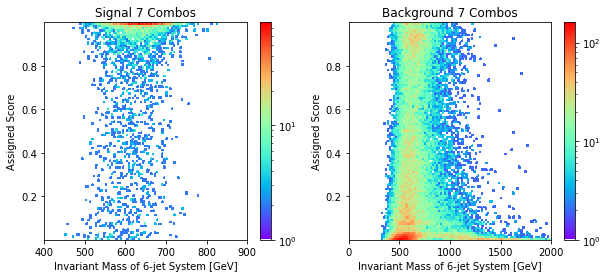

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].set_title("Signal 7 Combos")
ax[1].set_title("Background 7 Combos")

n, xedges, yedges, ims = hist2d(ax[0], p4_7.mass[combos7.sgnl_mask], scores_7[combos7.sgnl_mask], xbins=np.linspace(400,900,100))
n, xedges, yedges, imb = hist2d(ax[1], p4_7.mass[~combos7.sgnl_mask], scores_7[~combos7.sgnl_mask], xbins=np.linspace(0,2000,100))

plt.colorbar(ims, ax=ax[0])
plt.colorbar(imb, ax=ax[1])

ax[0].set_xlabel('Invariant Mass of 6-jet System [GeV]')
ax[1].set_xlabel('Invariant Mass of 6-jet System [GeV]')
ax[0].set_ylabel('Assigned Score')
ax[1].set_ylabel('Assigned Score')

plt.show()